In [10]:
from pathlib import Path

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
from sklearn.metrics.pairwise import haversine_distances

In [2]:
labels_path = Path('../data/features/nigeria-cropharvest/labels.geojson')
boundaries_path = Path('../assets/nigeria_borders.shp')

In [3]:
labels = gpd.read_file(labels_path)
labels

,is_crop,lat,lon,index,identifier,new_set,start_date,end_date,export_end_date,dataset,export_identifier,is_test,label,geometry
0,0,13.062977,7.169715,0,0,validation,2019-04-03,2020-03-28,2020-03-28,nigeria,0_nigeria_2019-04-03_2020-03-28,False,None,POINT (7.16971 13.06298)
1,0,9.861582,5.029259,1,1,training,2019-04-03,2020-03-28,2020-03-28,nigeria,1_nigeria_2019-04-03_2020-03-28,False,None,POINT (5.02926 9.86158)
2,0,10.442239,11.673885,2,2,testing,2019-04-03,2020-03-28,2020-03-28,nigeria,2_nigeria_2019-04-03_2020-03-28,True,None,POINT (11.67388 10.44224)
3,0,6.506252,6.584187,3,3,training,2019-04-03,2020-03-28,2020-03-28,nigeria,3_nigeria_2019-04-03_2020-03-28,False,None,POINT (6.58419 6.50625)
4,0,7.980531,7.099293,4,4,testing,2019-04-03,2020-03-28,2020-03-28,nigeria,4_nigeria_2019-04-03_2020-03-28,True,None,POINT (7.09929 7.98053)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0,11.505429,6.910431,1822,1822,validation,2019-04-03,2020-03-28,2020-03-28,nigeria,1822_nigeria_2019-04-03_2020-03-28,False,None,POINT (6.91043 11.50543)
1823,0,13.281881,13.412151,1823,1823,validation,2019-04-03,2020-03-28,2020-03-28,nigeria,1823_nigeria_2019-04-03_2020-03-28,False,None,POINT (13.41215 13.28188)
1824,0,8.912081,3.703954,1824,1824,testing,2019-04-03,2020-03-28,2020-03-28,nigeria,1824_nigeria_2019-04-03_2020-03-28,True,None,POINT (3.70395 8.91208)
1825,1,8.653739,4.971758,1825,1825,validation,2019-04-03,2020-03-28,2020-03-28,nigeria,1825_nigeria_2019-04-03_2020-03-28,False,None,POINT (4.97176 8.65374)


In [4]:
nigeria = gpd.read_file(boundaries_path)
nigeria

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,2,Nigeria,NGA,0,2,Sovereign country,Nigeria,NGA,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((7.30078 4.41816, 7.20391 4.387..."


### Version 1: with state borders

In [210]:
nigeria_states = gpd.read_file('../assets/ngaadmbndaadm1osgof20161215.geojson')
nigeria_states.to_crs(nigeria.crs, inplace=True)
nigeria_states

,admin1Name,admin1Pcod,admin1RefN,admin1AltN,admin1Al_1,admin0Name,admin0Pcod,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,Abia,NG001,Abia,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,4.695135,0.396543,"MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036..."
1,Adamawa,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,11.525443,3.113007,"MULTIPOLYGON (((13.62129 10.94823, 13.62592 10..."
2,Akwa Ibom,NG003,Akwa Ibom,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,5.263830,0.549476,"MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609..."
3,Anambra,NG004,Anambra,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,3.595960,0.392661,"MULTIPOLYGON (((6.93254 6.71090, 6.93167 6.698..."
4,Bauchi,NG005,Bauchi,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,13.952005,4.011018,"MULTIPOLYGON (((10.75125 12.46148, 10.75615 12..."
5,Bayelsa,NG006,Bayelsa,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,5.046708,0.776768,"MULTIPOLYGON (((6.55283 5.37988, 6.56198 5.379..."
6,Benue,NG007,Benue,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,9.408080,2.578363,"MULTIPOLYGON (((8.52442 8.15727, 8.54240 8.148..."
7,Borno,NG008,Borno,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,13.714364,5.987849,"MULTIPOLYGON (((13.35885 13.71261, 13.36207 13..."
8,Cross River,NG009,Cross River,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,8.779796,1.711218,"MULTIPOLYGON (((8.56068 4.79847, 8.55944 4.798..."
9,Delta,NG010,Delta,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,7.372526,1.394082,"MULTIPOLYGON (((6.66892 6.50123, 6.67111 6.484..."


In [211]:
# # Old figure (same as with scripts/visualize.py)
# labels.replace('testing', 'test', inplace=True)
# labels.replace('training', 'train', inplace=True)
# labels.replace('validation', 'validation', inplace=True)

# fig, ax = plt.subplots(figsize=(14, 14))

# nigeria.boundary.plot(ax=ax, color='black')
# labels.plot(ax=ax, column='new_set', markersize=20, cmap='viridis', marker='^', legend=True, legend_kwds={'fontsize': 24, 'loc': 'lower right', 'markerscale': 2})

# ax.set_xlabel('Longitude', fontsize=20)
# ax.set_ylabel('Latitude', fontsize=20)

# ax.tick_params(labelsize=16)
# ax.minorticks_on()
# ax.tick_params(size=5, which='minor')

# plt.show()

In [212]:
# Prepare data
splits = ['train', 'validation', 'test']
labels.replace('training', splits[0], inplace=True)
labels.replace('validation', splits[1], inplace=True)
labels.replace('testing', splits[2], inplace=True)
nigeria_states.replace('Federal Capital Territory', 'Fed. Capital Territory', inplace=True)

# Define colors and markers
markers = ['o', '^', 's']
colors = [
    'tab:green',  # Pastel Green
    'tab:blue',  # Pastel Blue
    'tab:orange'  # Pastel Yellow/Orange
]

/mnt/Data/jgajardo/miniconda3/envs/nigeria-crop-mask-gpu3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/mnt/Data/jgajardo/miniconda3/envs/nigeria-crop-mask-gpu3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == "__main__":
/mnt/Data/jgajardo/miniconda3/envs/nigeria-crop-mask-gpu3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/mnt/Data/jgajardo/miniconda3/envs/nigeria-crop-mask-gpu3/lib/python3.7/site-

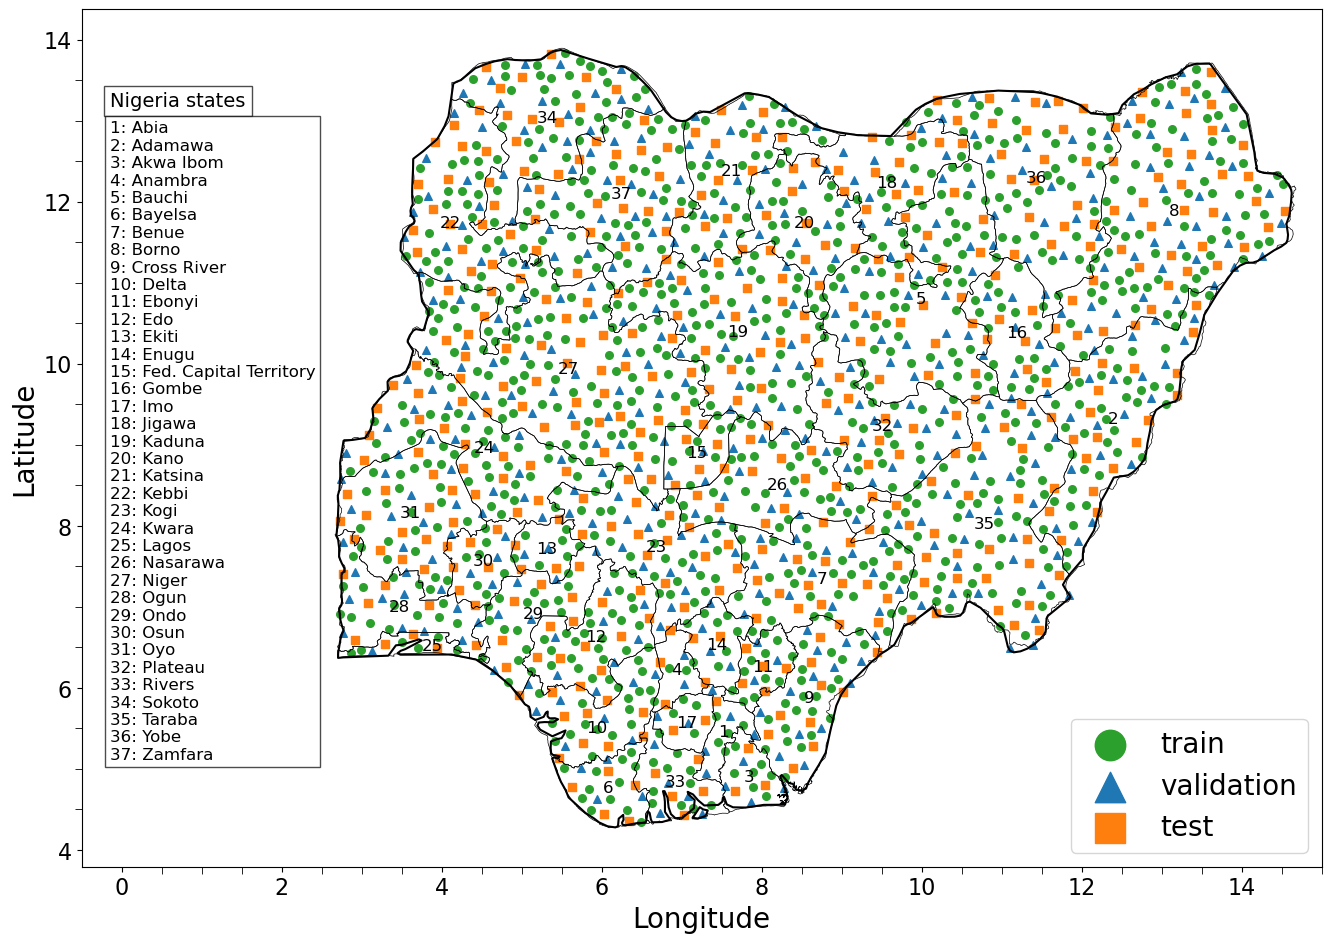

: 

In [215]:
# Plot the data
fig, ax = plt.subplots(figsize=(16, 16))

# Plot Nigeria and states
nigeria.boundary.plot(ax=ax, color='black')
nigeria_states.boundary.plot(ax=ax, color='black', linewidth=0.5)
for i, label in enumerate(nigeria_states['admin1Name']):
    x = nigeria_states.geometry.centroid.x.iloc[i]
    y = nigeria_states.geometry.centroid.y.iloc[i]
    # Adjust coordinates when centroid is not close to the middle of the state
    if label == 'Kebbi': x -= 0.4
    if label == 'Lagos': x += 0.3
    if label == 'Kwara': x += 0.15
    if label == 'Delta': y -= 0.2
    ax.annotate(str(i + 1), (x, y), fontsize=12, ha='center', va='center')

# Create box for state number/name "legend"
bbox_props = dict(boxstyle='square', edgecolor='black', facecolor='white', alpha=0.7)
state_names_with_numbers = [f"{i + 1}: {name}" for i, name in enumerate(nigeria_states['admin1Name'])]
ax.text(-0.14, 13.36, 'Nigeria states', fontsize=14, ha='left', va='top', bbox=bbox_props)#, transform=ax.transAxes
ax.text(-0.15, 13, "\n".join(state_names_with_numbers), fontsize=12, va='top', bbox=bbox_props)#, transform=ax.transAxes)

# Plot the splits with their respective colors and markers
for idx, split in enumerate(splits):
    subset = labels[labels['new_set'] == split]
    subset.plot(ax=ax, marker=markers[idx], markersize=30, label=split, color=colors[idx])

# Style and legend
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)
ax.tick_params(labelsize=16)
ax.minorticks_on()
ax.tick_params(size=5, which='minor')
ax.legend(fontsize=20, loc='lower right', markerscale=4)
ax.set_xlim(-0.5, 15)

# fig.savefig('../figures/nigeria_dataset_splits_new.png', bbox_inches='tight', dpi=600)
# fig.savefig('../figures/nigeria_dataset_splits_new.pdf', bbox_inches='tight', dpi=600)
plt.show()

### Version 2: without state borders, with ° in axes labels, and with north arrow and scale

In [6]:
# Prepare data
splits = ['train', 'validation', 'test']
labels.replace('training', splits[0], inplace=True)
labels.replace('validation', splits[1], inplace=True)
labels.replace('testing', splits[2], inplace=True)

# Define colors and markers
markers = ['o', '^', 's']
colors = [
    'tab:green',  # Pastel Green
    'tab:blue',  # Pastel Blue
    'tab:orange'  # Pastel Yellow/Orange
]

In [13]:
# Scale calculation in Nigeria
lat, lon = 9.042217, 7.288160
EARTH_RADIUS = 6371000 # meters
A = [lon * np.pi / 180., lat * np.pi / 180.]
B = [(lon + 1) * np.pi / 180., lat * np.pi / 180.]
dx = (EARTH_RADIUS) * haversine_distances([A, B])[0, 1] # gives meters/°

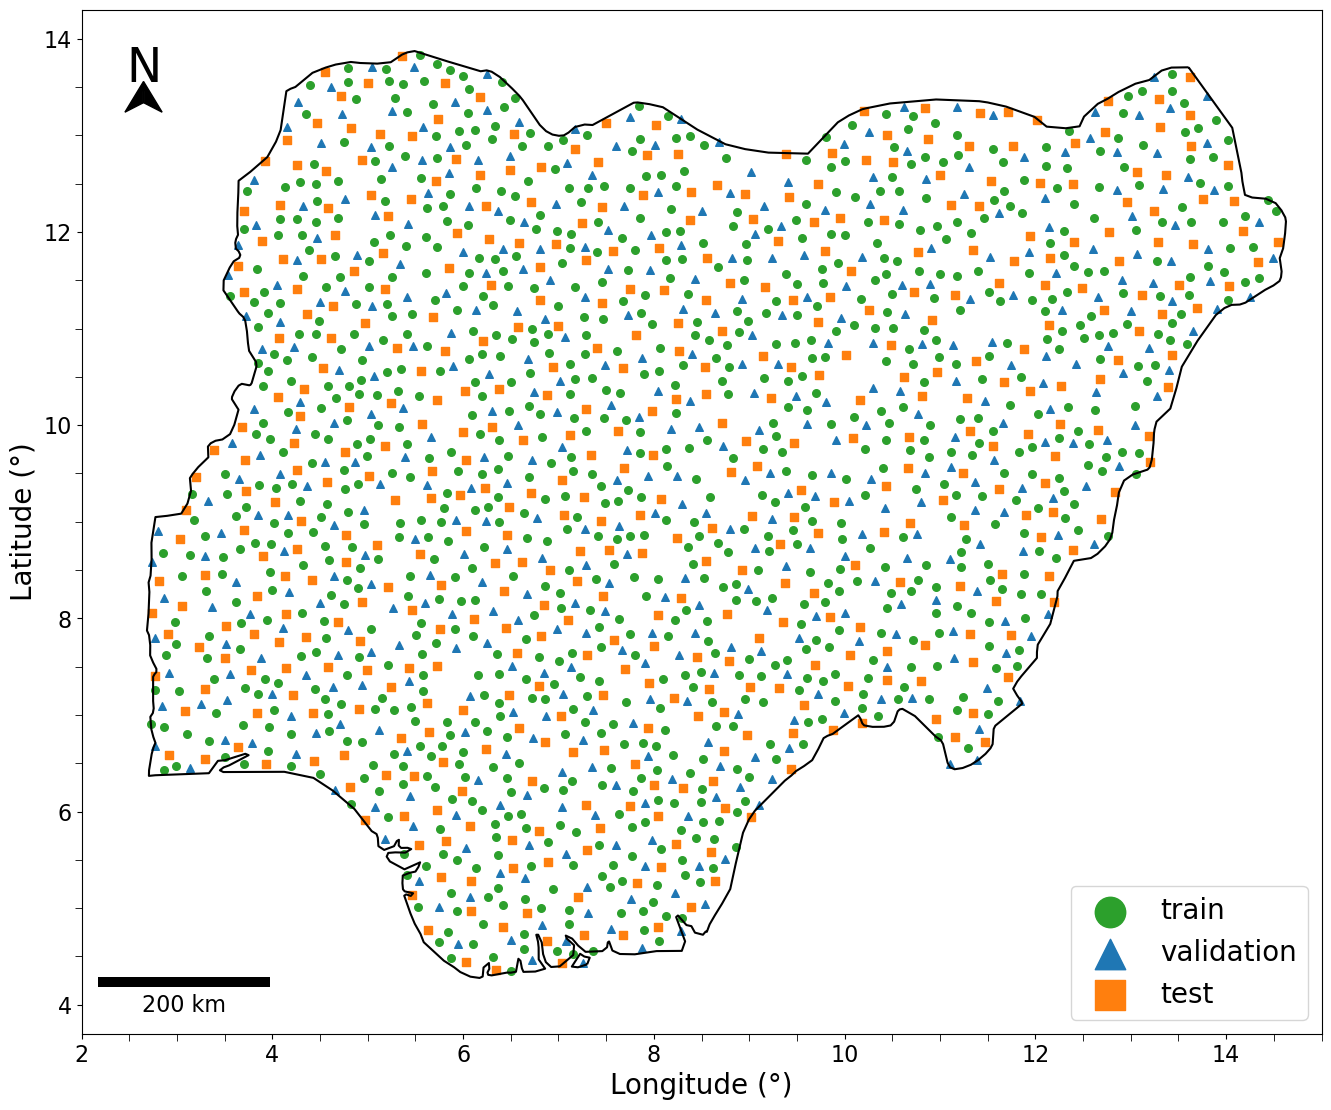

In [24]:
# Plot the data
fig, ax = plt.subplots(figsize=(16, 16))

# Plot Nigeria boundaries
nigeria.boundary.plot(ax=ax, color='black')

# Plot the splits with their respective colors and markers
for idx, split in enumerate(splits):
    subset = labels[labels['new_set'] == split]
    subset.plot(ax=ax, marker=markers[idx], markersize=30, label=split, color=colors[idx])

# North arrow
#ax.text(x=15, y=14.1, s='N', fontsize=34, horizontalalignment='center')
#ax.arrow(15, 14.1, 0, 0.01, width=0, length_includes_head=True, head_width=0.4, head_length=0.4, overhang=.3, facecolor='k', transform=ax.transData)
ax.annotate('N', xy=(0.05, 0.92), fontsize=34, xycoords='axes fraction', horizontalalignment='center', verticalalignment='bottom')
ax.arrow(0.05, 0.92, 0, 0.01, length_includes_head=True, head_width=0.03, head_length=0.03, overhang=.3, facecolor='k', transform=ax.transAxes)

# Scale bar
scalebar = ScaleBar(dx, "m", length_fraction=0.25, location="lower left", border_pad=1, font_properties={'size': 16}) # when CRS is in UTM dx can be set to 1
ax.add_artist(scalebar)

# Style and legend
ax.set_xlabel('Longitude (°)', fontsize=20)
ax.set_ylabel('Latitude (°)', fontsize=20)
ax.tick_params(labelsize=16)
ax.minorticks_on()
ax.tick_params(size=5, which='minor')
ax.legend(fontsize=20, loc='lower right', markerscale=4)
ax.set_xlim(2, 15)
ax.set_ylim(3.7, 14.3)

plt.margins(0.1)

fig.savefig('../figures/nigeria_dataset_splits_latest.png', bbox_inches='tight', dpi=600)
fig.savefig('../figures/nigeria_dataset_splits_latest.pdf', bbox_inches='tight', dpi=600)

plt.show()